# Regression - Predicting House Pricing

## Importing Necessary Libraries

In [582]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

import warnings 
warnings.filterwarnings("ignore")

## Loading the Dataset

In [583]:
df = pd.read_csv("kc_house_data.csv")

# EDA - Exploratory Data Analysis

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [585]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [586]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [587]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13079,8651730580,20150330T000000,531000.0,3,2.25,1910,8390,1.0,0,0,...,7,1910,0,1979,0,98034,47.7300,-122.216,2410,8390
2917,49500090,20141205T000000,372000.0,4,1.50,1780,7914,1.5,0,0,...,7,1780,0,1962,0,98059,47.5142,-122.163,1350,8069
3573,1331900110,20141008T000000,760000.0,4,2.50,2960,28005,2.0,0,0,...,10,2960,0,1989,0,98072,47.7477,-122.117,3510,35248
19924,6056100383,20140520T000000,380000.0,3,1.75,1690,1468,2.0,0,0,...,8,1380,310,2008,0,98108,47.5630,-122.297,1690,1936
8957,3121500150,20150423T000000,894000.0,4,2.50,3800,22029,2.0,0,0,...,9,3800,0,1993,0,98053,47.6734,-122.026,3170,24979
9714,225079036,20150107T000000,937500.0,4,4.00,5545,871200,2.0,0,0,...,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
16784,1138010170,20140801T000000,350000.0,3,1.00,860,7030,1.0,0,0,...,7,860,0,1973,0,98034,47.7151,-122.211,1360,7500
754,4385700765,20140603T000000,850000.0,3,1.75,1370,3850,1.0,0,0,...,7,770,600,1911,1988,98112,47.6374,-122.279,1390,3600
1132,2171400126,20140605T000000,269000.0,3,1.00,1690,4250,1.0,0,0,...,7,1020,670,1967,0,98178,47.4945,-122.258,1820,8865
1248,8682281170,20141113T000000,449000.0,2,1.75,1510,6852,1.0,0,0,...,8,1510,0,2005,0,98053,47.7073,-122.012,1510,5912


In [588]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [589]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [590]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


### We take the features which are between 20 and 90

In [591]:
abs(df.corr()["price"]).sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

### When we do this, we have the opportunity to see in more detail, something like we make it 10 times smaller.

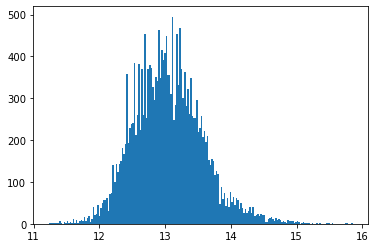

In [592]:
plt.hist((np.log(df.price)), bins = 200);

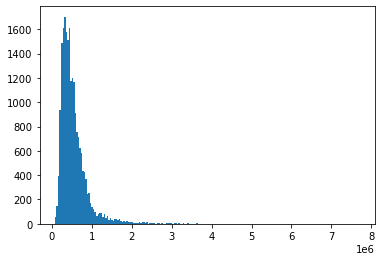

In [593]:
plt.hist(df.price, bins = 200);

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

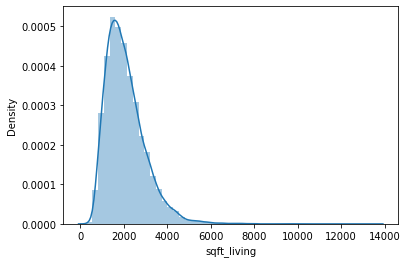

In [594]:
sns.distplot(df["sqft_living"])

### I chose these graphs because they are up in the correlation matrix

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

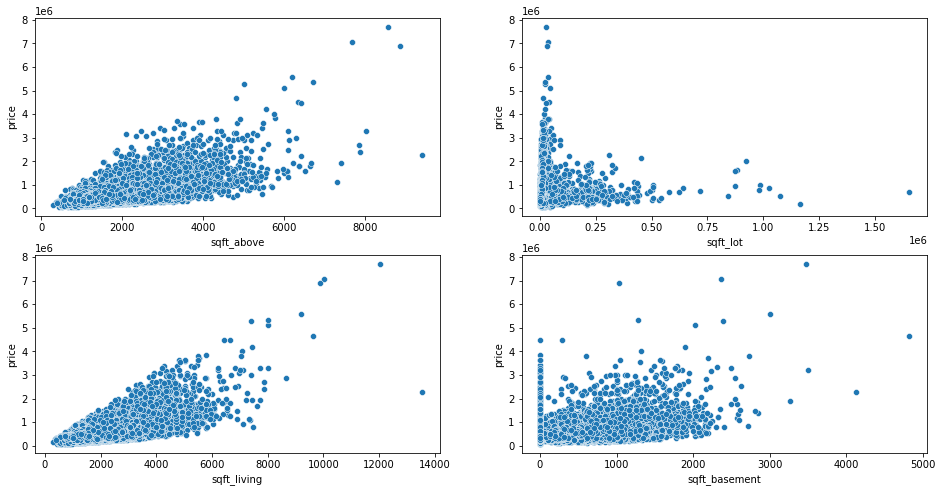

In [595]:
fig = plt.figure(figsize = (16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(x="sqft_above", y="price", data=df)
fig.add_subplot(2,2,2)
sns.scatterplot(x="sqft_lot", y="price", data=df)
fig.add_subplot(2,2,3)
sns.scatterplot(x="sqft_living", y="price", data=df)
fig.add_subplot(2,2,4)
sns.scatterplot(x="sqft_basement", y="price", data=df)

### It is more logical to draw a countplot graph in this type of data, rather than comparing it with the price

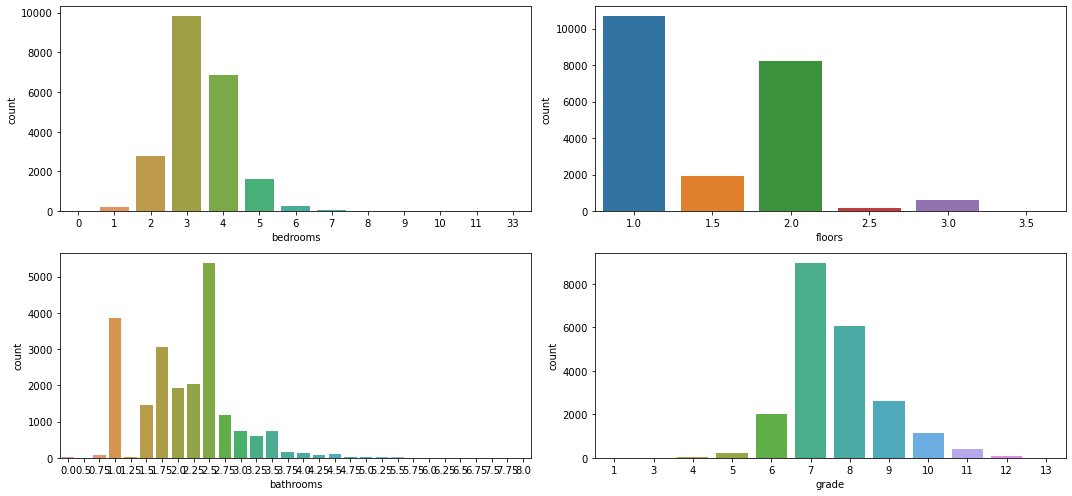

In [596]:
fig = plt.figure(figsize = (15,7))
fig.add_subplot(2,2,1)
sns.countplot(df["bedrooms"])
fig.add_subplot(2,2,2)
sns.countplot(df["floors"])
fig.add_subplot(2,2,3)
sns.countplot(df["bathrooms"])
fig.add_subplot(2,2,4)
sns.countplot(df["grade"])
plt.tight_layout()

### Outliers are clear here

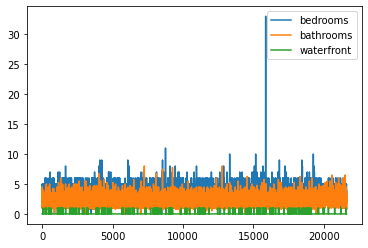

In [597]:
df.bedrooms.plot(), df.bathrooms.plot(), df.waterfront.plot()
plt.legend()

<AxesSubplot:>

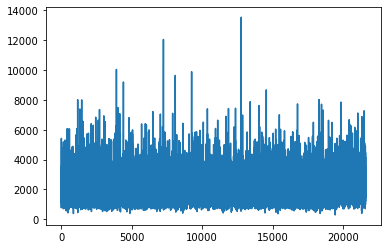

In [598]:
df.sqft_living.plot()

<AxesSubplot:>

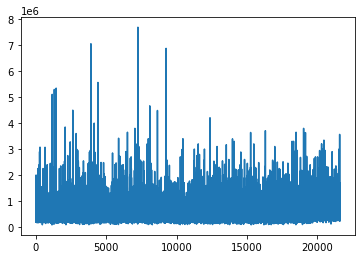

In [599]:
df.price.plot()

<AxesSubplot:>

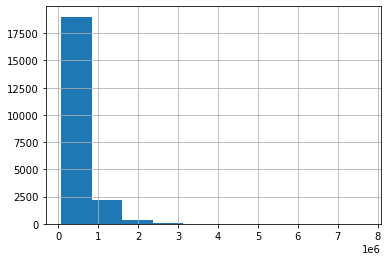

In [600]:
df.price.hist()

<AxesSubplot:xlabel='sqft_living'>

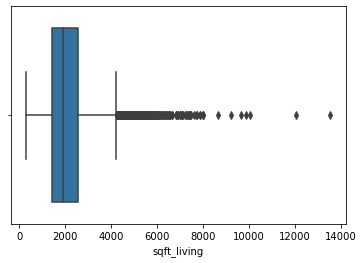

In [601]:
sns.boxplot(df["sqft_living"])

<AxesSubplot:xlabel='grade', ylabel='Density'>

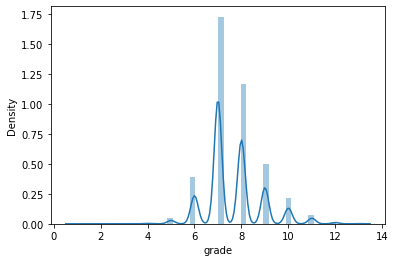

In [602]:
sns.distplot(df["grade"])

<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

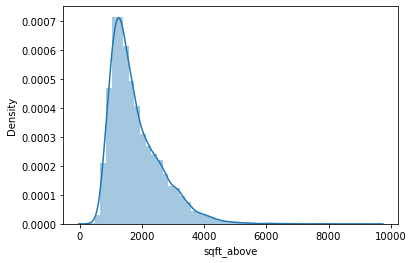

In [603]:
sns.distplot(df["sqft_above"])

<AxesSubplot:xlabel='sqft_above'>

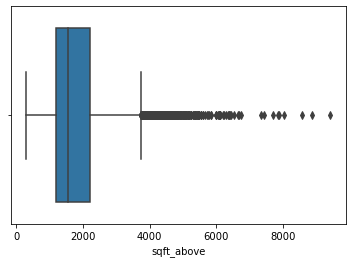

In [604]:
sns.boxplot(df["sqft_above"])

<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

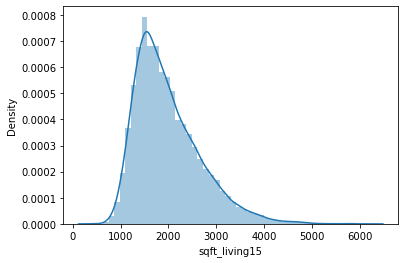

In [605]:
sns.distplot(df["sqft_living15"])

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

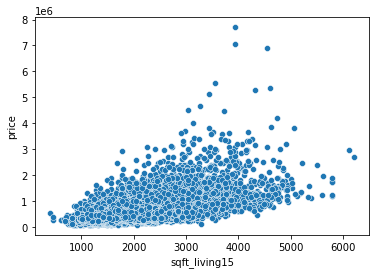

In [606]:
sns.scatterplot(x="sqft_living15", y="price", data=df)

<AxesSubplot:xlabel='sqft_living15'>

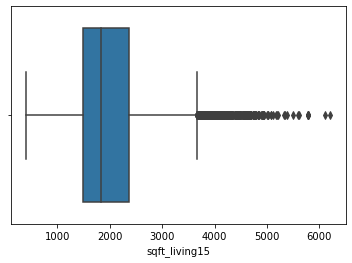

In [607]:
sns.boxplot(df["sqft_living15"])

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

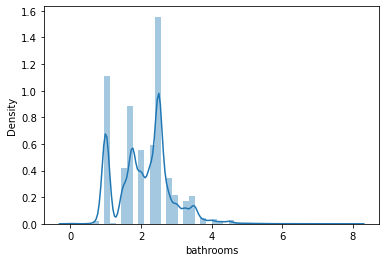

In [608]:
sns.distplot(df["bathrooms"])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

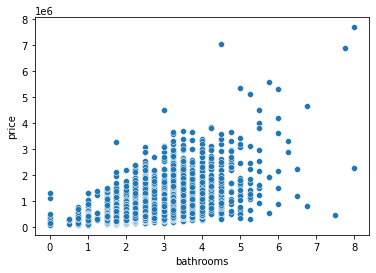

In [609]:
sns.scatterplot(x="bathrooms", y="price", data=df)

<AxesSubplot:xlabel='bathrooms'>

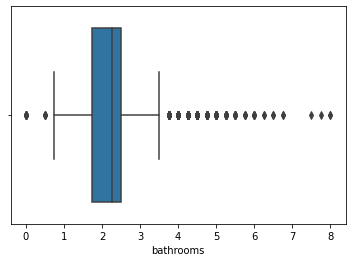

In [610]:
sns.boxplot(df["bathrooms"])

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

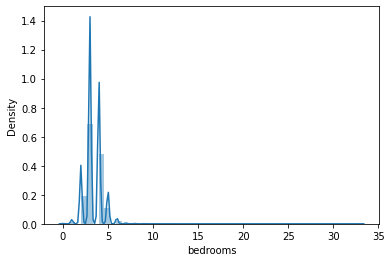

In [611]:
sns.distplot(df["bedrooms"])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

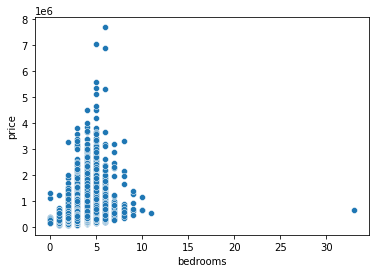

In [612]:
sns.scatterplot(x="bedrooms", y="price", data=df)

<AxesSubplot:xlabel='bedrooms'>

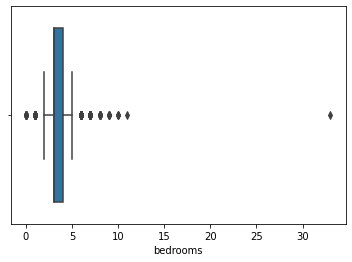

In [613]:
sns.boxplot(df["bedrooms"])

<AxesSubplot:xlabel='view', ylabel='Density'>

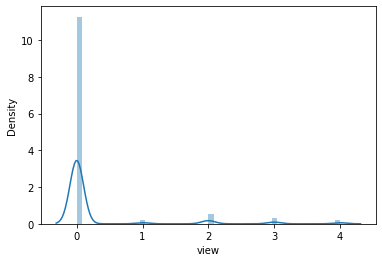

In [614]:
sns.distplot(df["view"])

<AxesSubplot:xlabel='view', ylabel='price'>

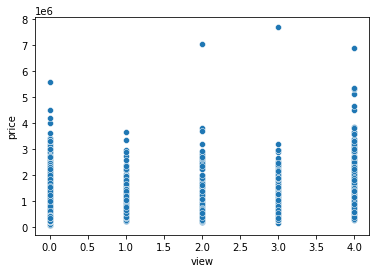

In [615]:
sns.scatterplot(x="view", y="price", data=df)

<AxesSubplot:xlabel='view'>

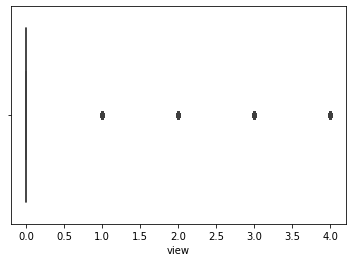

In [616]:
sns.boxplot(df["view"])

<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

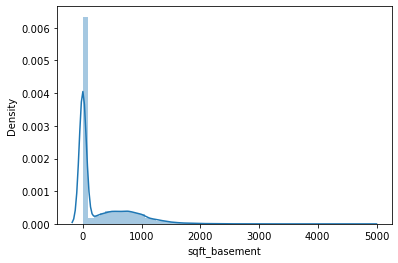

In [617]:
sns.distplot(df["sqft_basement"])

<AxesSubplot:xlabel='lat', ylabel='Density'>

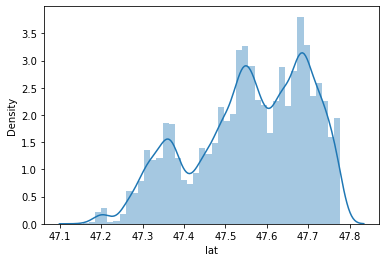

In [618]:
sns.distplot(df["lat"])

<AxesSubplot:xlabel='lat', ylabel='price'>

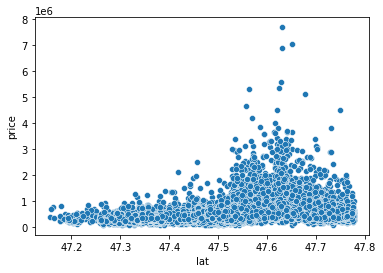

In [619]:
sns.scatterplot(x="lat", y="price", data=df)

<AxesSubplot:xlabel='lat'>

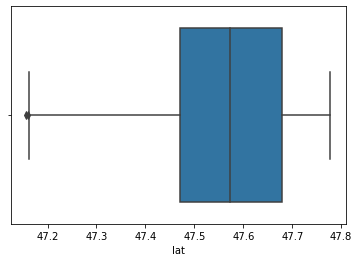

In [620]:
sns.boxplot(df["lat"])

<AxesSubplot:xlabel='waterfront', ylabel='Density'>

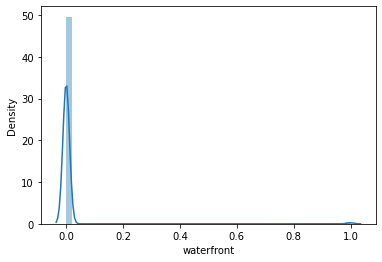

In [621]:
sns.distplot(df["waterfront"])

In [622]:
df["waterfront"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='floors', ylabel='Density'>

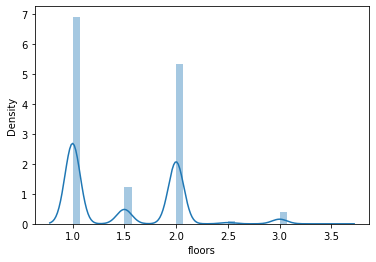

In [623]:
sns.distplot(df["floors"])

<AxesSubplot:xlabel='price', ylabel='Density'>

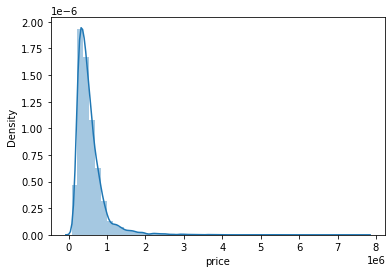

In [624]:
sns.distplot(df["price"])

<AxesSubplot:xlabel='price'>

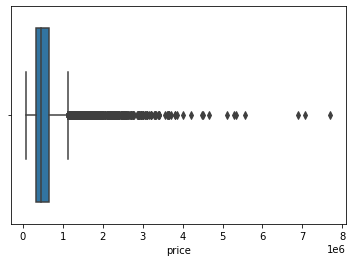

In [625]:
sns.boxplot(df["price"])

In [626]:
df["price"].sort_values(ascending=False)

7252     7700000.0
3914     7062500.0
9254     6885000.0
4411     5570000.0
1448     5350000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21613, dtype: float64

In [627]:
df["floors"].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [628]:
df["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [629]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [630]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


## Feature Engineering

In [631]:
# According to the graphs we drew above, we add mean + 3*std and find outlier values

df["zipcode"] = df["zipcode"].astype("category")

# We categorize view 0 1 2 3 4 because there is not much difference between 1 and 0, 
# whereas if we consider it as a view, there is a lot of difference.

df["view"] = df["view"].astype("category")

# Likewise, we categorize the waterfront because there is a big difference between 0 and 1, 
# but when evaluated numerically, there is no big difference, so we categorize it.

df["waterfront"] = df["waterfront"].astype("category")


df = df[(df["price"] < 1600000)]

df = df[(df["sqft_living"] < 4900)]

df = df[(df["grade"] < 11.5)]

df = df[(df["sqft_above"] < 4300)]

df = df[(df["sqft_living15"] < 4100)]

df = df[(df["bedrooms"] < 7)]

df = df[(df["bathrooms"] < 5)] 

df = df[(df["floors"] < 3.4)] 

# We increase its impact
df["bedrooms"] = df["bedrooms"]**2
df["bathrooms"] = df["bathrooms"]**2 

# There is not much difference between 2000 and 2010 but there is a big difference between 10 years and 30 years
df["age"] = 2021 - df["yr_built"]

# What we're doing here is mark the basement as 1 if the basement sqft is greater than 0, otherwise mark it as 0
df["basement"] = np.where(df["sqft_basement"] > 0, 1, 0)
df["renovated"] = np.where(df["yr_renovated"] > 0, 1, 0)

In [632]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,basement,renovated
0,7129300520,20141013T000000,221900.0,9,1.0000,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,66,0,0
1,6414100192,20141209T000000,538000.0,9,5.0625,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,70,1,1
2,5631500400,20150225T000000,180000.0,4,1.0000,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,88,0,0
3,2487200875,20141209T000000,604000.0,16,9.0000,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,56,1,0
4,1954400510,20150218T000000,510000.0,9,4.0000,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,9,6.2500,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,12,0,0
21609,6600060120,20150223T000000,400000.0,16,6.2500,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,7,0,0
21610,1523300141,20140623T000000,402101.0,4,0.5625,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,12,0,0
21611,291310100,20150116T000000,400000.0,9,6.2500,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,17,0,0


<AxesSubplot:>

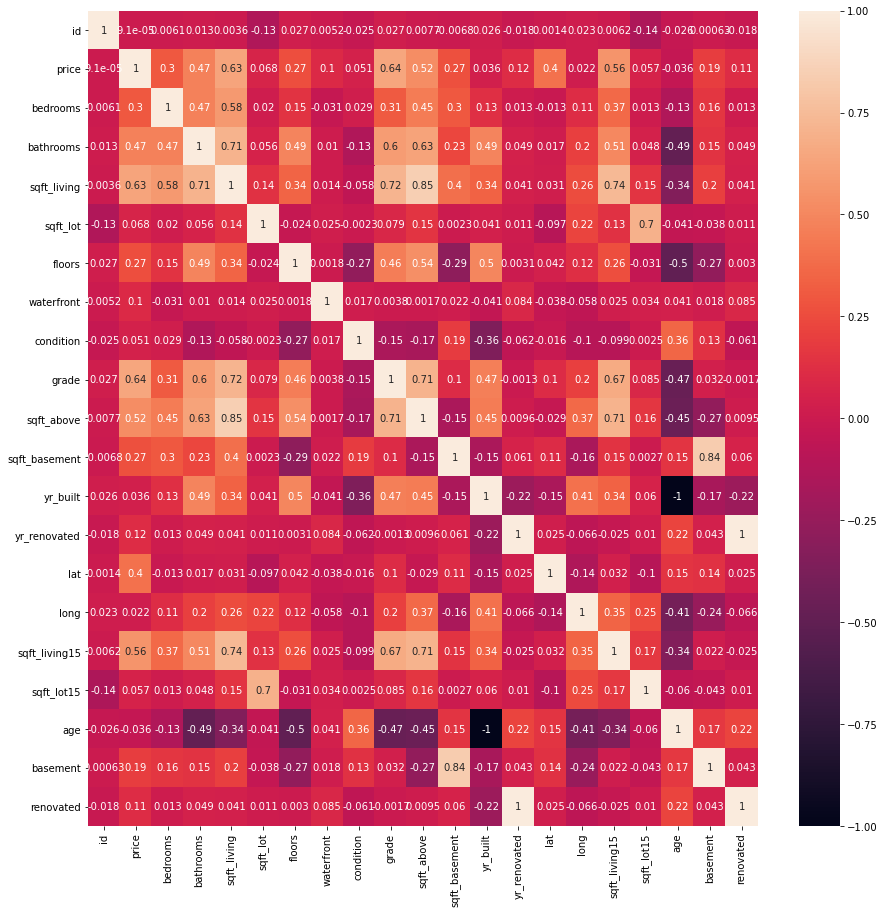

In [633]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)

In [634]:
from sklearn.linear_model import LinearRegression # sklearn = Science Kit Learn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [635]:
x, y = df[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "sqft_basement", "bedrooms", "lat", "waterfront", "floors", "zipcode", "age"]], df[["price"]]

In [636]:
x.shape, y.shape

((20843, 13), (20843, 1))

In [637]:
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,zipcode,age
0,1180,7,1180,1340,1.0000,0,0,9,47.5112,0,1.0,98178,66
1,2570,7,2170,1690,5.0625,0,400,9,47.7210,0,2.0,98125,70
2,770,6,770,2720,1.0000,0,0,4,47.7379,0,1.0,98028,88
3,1960,7,1050,1360,9.0000,0,910,16,47.5208,0,1.0,98136,56
4,1680,8,1680,1800,4.0000,0,0,9,47.6168,0,1.0,98074,34


In [638]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20843 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20843 non-null  int64   
 1   date           20843 non-null  object  
 2   price          20843 non-null  float64 
 3   bedrooms       20843 non-null  int64   
 4   bathrooms      20843 non-null  float64 
 5   sqft_living    20843 non-null  int64   
 6   sqft_lot       20843 non-null  int64   
 7   floors         20843 non-null  float64 
 8   waterfront     20843 non-null  int64   
 9   view           20843 non-null  category
 10  condition      20843 non-null  int64   
 11  grade          20843 non-null  int64   
 12  sqft_above     20843 non-null  int64   
 13  sqft_basement  20843 non-null  int64   
 14  yr_built       20843 non-null  int64   
 15  yr_renovated   20843 non-null  int64   
 16  zipcode        20843 non-null  category
 17  lat            20843 non-null  

In [640]:
x = pd.get_dummies(x, drop_first = True)
# Kukla değişken Sparse Matrix
# ilk sütunu düşürebiliyoruz, çünkü bir sütunu silince yine anlayabiliyor, silmeye de bilirsin

In [641]:
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,sqft_basement,bedrooms,lat,waterfront,floors,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,7,1180,1340,1.0000,0,9,47.5112,0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7,2170,1690,5.0625,400,9,47.7210,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,770,6,770,2720,1.0000,0,4,47.7379,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1960,7,1050,1360,9.0000,910,16,47.5208,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1680,8,1680,1800,4.0000,0,9,47.6168,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [642]:
x.describe()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,sqft_basement,bedrooms,lat,waterfront,floors,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,...,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000,20843.000000
mean,1990.917046,7.563067,1716.012282,1933.763662,4.747637,274.904764,11.827904,47.558484,0.004222,1.479657,...,0.013818,0.002735,0.021062,0.011946,0.012858,0.011611,0.012474,0.006525,0.013386,0.014489
std,771.212973,1.060131,716.707970,612.794464,3.047222,414.392041,6.054243,0.139959,0.064841,0.537075,...,0.116736,0.052224,0.143595,0.108648,0.112665,0.107128,0.110992,0.080515,0.114923,0.119499
min,290.000000,1.000000,290.000000,399.000000,0.000000,0.000000,0.000000,47.155900,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1410.000000,7.000000,1180.000000,1480.000000,2.250000,0.000000,9.000000,47.464850,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1876.000000,7.000000,1530.000000,1815.000000,5.062500,0.000000,9.000000,47.569500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2470.000000,8.000000,2130.000000,2300.000000,6.250000,530.000000,16.000000,47.679100,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4883.000000,11.000000,4290.000000,4090.000000,22.562500,2300.000000,36.000000,47.777600,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [643]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 13) # train_size = 0.8

In [644]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18758, 84), (2085, 84), (18758, 1), (2085, 1))

In [645]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [646]:
y_pred = LR.predict(x_test)
y_pred

array([[400493.55933305],
       [266335.97775355],
       [315745.10277573],
       ...,
       [821564.4104442 ],
       [422037.13689523],
       [332882.43244472]])

In [647]:
(mean_squared_error(y_test, y_pred))**0.5 

96728.46977056886

In [648]:
r2_score(y_test,y_pred) # başarı oranı %80 üstü, hata oranı 100k üstü olacak

0.8291443295578692

In [649]:
 print(LR.coef_)

[[ 7.25269553e+01  5.16873530e+04  5.90116549e+01  2.63138216e+01
   5.75649554e+03  1.35153003e+01 -1.33209369e+03  1.39643540e+05
   2.04717351e+05 -2.24397204e+04  9.07036259e+02  6.95087822e+04
   6.62597470e+04  1.27694247e+05  2.15953090e+05  2.19276990e+04
  -8.82539764e+03  5.64723427e+05  2.91611275e+05  2.45212309e+05
   2.18759947e+05  2.00550065e+05  1.01172631e+05  7.31505631e+04
   7.14709911e+04  4.65404256e+04  3.54051483e+04 -2.59864155e+04
   1.29197795e+05  1.61524702e+05  6.87029889e+04  1.84711383e+05
  -1.23485260e+03  4.99005447e+03 -8.72650164e+03  3.03241382e+05
   1.34728207e+05  3.51785349e+04  7.38239838e+05  4.43874338e+05
   9.25100630e+03  8.62345426e+04  1.95199508e+05  1.77999727e+05
   1.99679902e+04  8.40886104e+04  1.96967346e+04  7.82059857e+04
   8.57489620e+04  9.05018972e+04  1.18224069e+05  1.53521443e+05
   1.80219499e+05  1.03925785e+05 -1.47213252e+04  3.84518609e+05
   2.72729340e+05  3.71476052e+05  9.04665267e+04  2.66101506e+05
   7.74787

# Linear Regression <<--

# Ridge ve Lasso -->>

In [650]:
from sklearn.linear_model import Ridge, Lasso

In [651]:
R = Ridge()
R.fit(x_train, y_train)

Ridge()

In [652]:
y_pred_ridge = R.predict(x_test)
y_pred_ridge

array([[400850.48856527],
       [271185.57598094],
       [318387.33776182],
       ...,
       [815654.83703588],
       [425998.82415134],
       [334577.7586101 ]])

In [653]:
(mean_squared_error(y_test, y_pred_ridge))**0.5

96944.04037124116

In [654]:
r2_score(y_test, y_pred_ridge)

0.8283819376544282

# Lasso Regression

In [655]:
L = Lasso()
L.fit(x_train, y_train)

Lasso()

In [656]:
y_pred_lasso = L.predict(x_test)

In [657]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

96750.5453669539

In [658]:
r2_score(y_test, y_pred_lasso)

0.8290663345016576

In [659]:
from sklearn.linear_model import ElasticNet

In [660]:
E = ElasticNet(l1_ratio = 0.8)
E.fit(x_train, y_train)

ElasticNet(l1_ratio=0.8)

In [661]:
y_pred_elastic = E.predict(x_test)

In [662]:
(mean_squared_error(y_test,y_pred_elastic))**0.5

144647.160623778

In [663]:
r2_score(y_test, y_pred_elastic)

0.6179320675086757

# Extra Tree Regressor

In [664]:
from sklearn.tree import ExtraTreeRegressor

In [665]:
ETR = ExtraTreeRegressor()
ETR.fit(x_train, y_train)

ExtraTreeRegressor()

In [666]:
y_pred_etr = ETR.predict(x_test)

In [667]:
(mean_squared_error(y_test,y_pred_etr))**0.5

127165.84462314645

In [668]:
r2_score(y_test, y_pred_etr)

0.7047011725227724

# Gradient Boosting Regressor

In [669]:
from sklearn.ensemble import GradientBoostingRegressor

In [670]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)

GradientBoostingRegressor()

In [671]:
y_pred_gbr = GBR.predict(x_test)

In [672]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

92852.96512379315

In [673]:
r2_score(y_test, y_pred_gbr)

0.8425610024098132